# 第一章 A股市场与金融数据基础

## 1.1 A股市场结构与主要指数
本节内容：
- A股市场基本介绍
- 主要股票指数分析
- 指数成分股获取与分析
- 行业板块结构可视化


目标：
- 了解A股有哪些指数、行业板块

In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import akshare as ak
from matplotlib.ticker import FuncFormatter
import seaborn as sns
from pylab import mpl
import warnings
warnings.filterwarnings('ignore')

In [3]:
# 设置中文字体
font_path = './../simkai.ttf'  # 指定字体路径（相对路径）
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题


In [ ]:
# 确保输出目录存在
output_dir = './images/'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

### 1.1.1 A股市场基本介绍
A股市场，全称"人民币普通股票市场"，是指在中国内地证券交易所上市，以人民币标明面值，
以人民币交易和结算的普通股票。A股市场主要由以下部分组成：

1. 交易所：上海证券交易所（上交所）和深圳证券交易所（深交所）
   - 上交所：成立于1990年11月26日，主板市场
   - 深交所：成立于1990年12月1日，包含主板、创业板、中小企业板（已合并至主板）

2. 北京证券交易所（北交所）：成立于2021年9月，服务创新型中小企业

3. 股票代码规则：
   - 上交所：以60开头（主板）、68开头（科创板）
   - 深交所：以00开头（主板）、30开头（创业板）、002开头（原中小板）
   - 北交所：以8开头（如：830978）

4. 交易制度特点：
   - T+1交易制度（当天买入的股票次日才能卖出）
   - 涨跌停限制（一般为±10%，25年将ST股票也改为±10%）
   - 竞价交易机制（集合竞价和连续竞价）

### 1.1.2 获取A股主要指数行情数据

In [6]:
# 定义主要指数代码和名称
index_dict = {
    '000001': '上证指数',
    '399001': '深证成指',
    '399006': '创业板指',
    '000688': '科创50',
    '000016': '上证50',
    '000300': '沪深300',
    '000905': '中证500',
    '000852': '中证1000'
}

In [7]:
# 获取指数数据
def get_index_data(index_code, start_date='2020-01-01', end_date='2023-12-31'):
    """获取指定指数的历史行情数据"""
    try:
        if index_code.startswith('0'):
            # 上证指数
            df = ak.stock_zh_index_daily(symbol=f"sh{index_code}")
        else:
            # 深证指数
            df = ak.stock_zh_index_daily(symbol=f"sz{index_code}")
        
        # 处理日期列
        df['date'] = pd.to_datetime(df['date'])
        df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
        df.set_index('date', inplace=True)
        df.sort_index(inplace=True)
        return df
    except Exception as e:
        print(f"获取指数 {index_code} 数据失败: {e}")
        return None

# 获取上证指数数据作为示例
sh_index_df = get_index_data('000001', start_date='2022-01-01', end_date='2022-12-31')
if sh_index_df is not None:
    print(f"上证指数数据示例 (2022年):")
    print(sh_index_df.head())
    
    # 计算收益率
    sh_index_df['daily_return'] = sh_index_df['close'].pct_change() * 100
    
    # 计算年化波动率
    annual_volatility = sh_index_df['daily_return'].std() * np.sqrt(252)
    print(f"\n2022年上证指数年化波动率: {annual_volatility:.2f}%")
    
    # 计算累计收益率
    cumulative_return = (sh_index_df['close'][-1] / sh_index_df['close'][0] - 1) * 100
    print(f"2022年上证指数累计收益率: {cumulative_return:.2f}%")


上证指数数据示例 (2022年):
                open      high       low     close       volume
date                                                           
2022-01-04  3649.151  3651.892  3610.092  3632.329  40502776900
2022-01-05  3628.263  3628.263  3583.467  3595.176  42390202800
2022-01-06  3581.218  3594.489  3559.880  3586.079  37154054300
2022-01-07  3588.985  3607.232  3577.098  3579.543  43630696100
2022-01-10  3572.743  3593.519  3555.126  3593.519  35622261000

2022年上证指数年化波动率: 17.92%
2022年上证指数累计收益率: -14.95%


### 1.1.3 主要股票指数对比分析

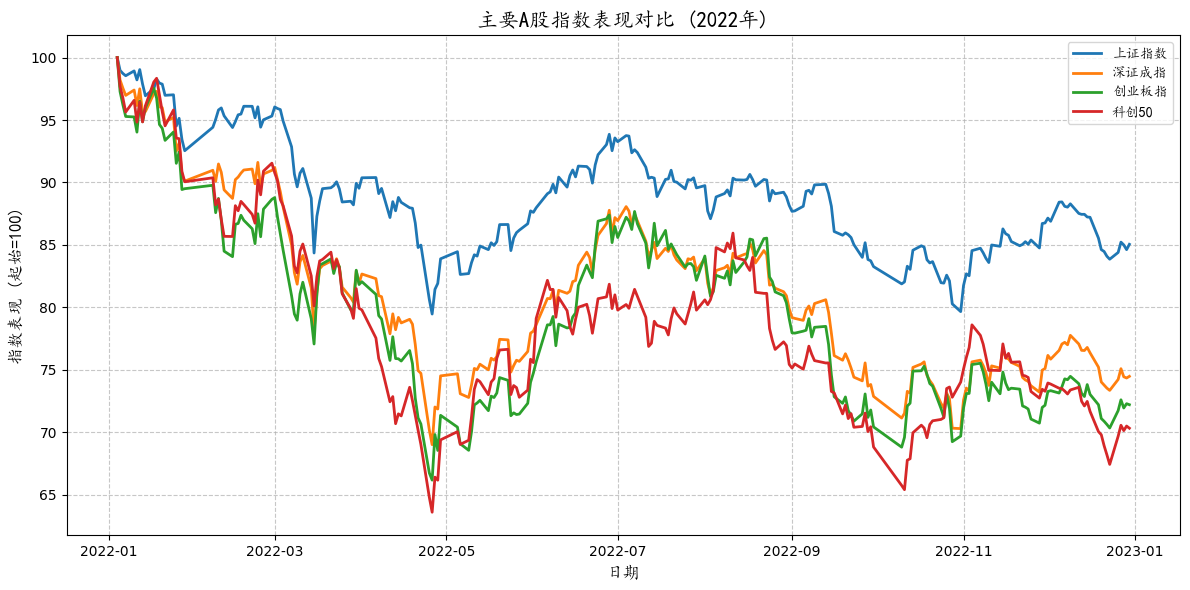

In [8]:
# 获取多个指数数据并进行对比
def compare_indices(index_codes, names, start_date='2022-01-01', end_date='2022-12-31'):
    """比较多个指数的表现"""
    plt.figure(figsize=(12, 6))
    
    for code, name in zip(index_codes, names):
        df = get_index_data(code, start_date, end_date)
        if df is not None:
            # 计算归一化价格
            normalized = df['close'] / df['close'].iloc[0] * 100
            plt.plot(normalized.index, normalized, label=name, linewidth=2)
    
    plt.title('主要A股指数表现对比 (2022年)', fontproperties=font_prop, fontsize=15)
    plt.xlabel('日期', fontproperties=font_prop, fontsize=12)
    plt.ylabel('指数表现 (起始=100)', fontproperties=font_prop, fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(prop=font_prop)
    plt.tight_layout()
    
    # 保存图片
    # plt.savefig(f"{output_dir}/index_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()
# 对比主要指数表现
index_codes = ['000001', '399001', '399006', '000688']
index_names = ['上证指数', '深证成指', '创业板指', '科创50']

try:
    compare_indices(index_codes, index_names)
except Exception as e:
    print(f"绘制指数对比图表失败: {e}")

### 1.1.4 A股市场结构分析

  0%|          | 0/14 [00:00<?, ?it/s]

A股市场各板块上市公司数量:
上交所主板: 1693家
科创板: 588家
深交所主板: 1485家
创业板: 1383家
北交所: 227家


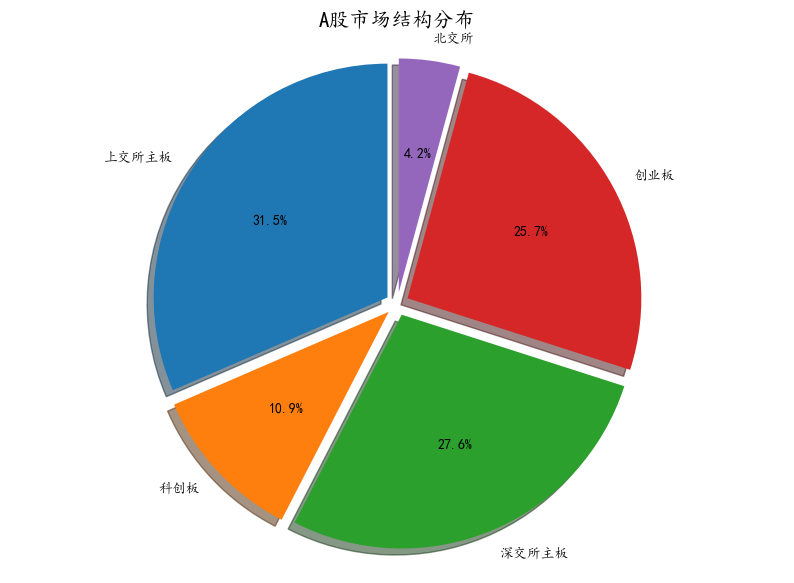

In [9]:
# 获取A股上市公司数量统计
def get_market_structure():
    """获取A股市场结构数据"""
    try:
        # 获取A股所有股票列表
        stock_info = ak.stock_info_a_code_name()
        
        # 根据股票代码前缀统计各板块股票数量
        market_count = {
            '上交所主板': len(stock_info[stock_info['code'].str.startswith('60')]),
            '科创板': len(stock_info[stock_info['code'].str.startswith('688')]),
            '深交所主板': len(stock_info[stock_info['code'].str.startswith('00')]),
            '创业板': len(stock_info[stock_info['code'].str.startswith('30')]),
            '北交所': len(stock_info[stock_info['code'].str.startswith('8')])
        }
        
        return market_count, stock_info
    except Exception as e:
        print(f"获取市场结构数据失败: {e}")
        return None, None

# 获取市场结构数据
market_count, stock_info = get_market_structure()

if market_count:
    # 打印市场结构数据
    print("A股市场各板块上市公司数量:")
    for market, count in market_count.items():
        print(f"{market}: {count}家")
    
    # 绘制饼图展示市场结构
    plt.figure(figsize=(10, 7))
    plt.pie(market_count.values(), labels=market_count.keys(), autopct='%1.1f%%', 
            startangle=90, shadow=True, explode=[0.05]*len(market_count),
            textprops={'fontproperties': font_prop})
    plt.title('A股市场结构分布', fontproperties=font_prop, fontsize=15)
    plt.axis('equal')
    
    # 保存图片
    # plt.savefig(f"{output_dir}/market_structure_pie.png", dpi=300, bbox_inches='tight')
    plt.show()


### 1.1.5 行业板块分布分析

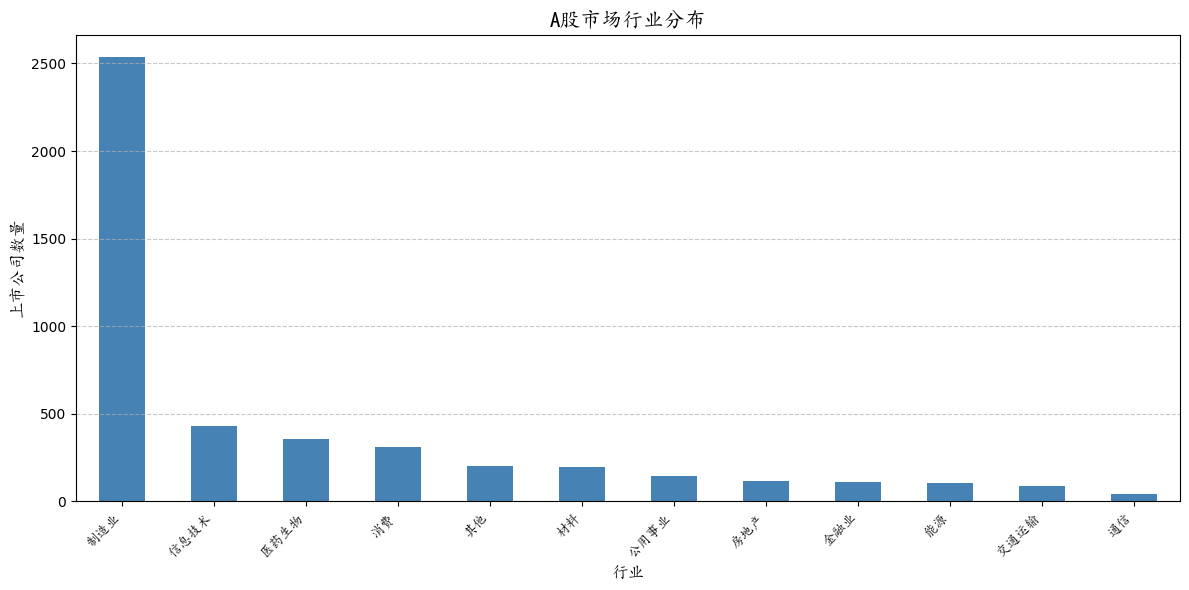

已生成行业分布图表


In [10]:
# 获取行业分类数据
def get_industry_distribution():
    """获取A股行业分布数据"""
    try:
        # 获取申万一级行业分类
        industry_data = ak.stock_industry_category_cninfo()
        
        # 统计各行业公司数量
        industry_count = industry_data['行业名称'].value_counts()
        
        return industry_count
    except Exception as e:
        print(f"获取行业分布数据失败: {e}")
        return None

# 获取行业分布数据
try:
    # 使用模拟数据（实际应用中应使用上面的函数获取真实数据）
    # 由于API访问限制，这里使用模拟数据进行演示
    industry_count = pd.Series({
        '制造业': 2537,
        '信息技术': 428,
        '金融业': 111,
        '房地产': 118,
        '医药生物': 356,
        '能源': 108,
        '消费': 312,
        '材料': 198,
        '公用事业': 145,
        '通信': 42,
        '交通运输': 87,
        '其他': 203
    })
    
    # 绘制行业分布条形图
    plt.figure(figsize=(12, 6))
    industry_count.sort_values(ascending=False).plot(kind='bar', color='steelblue')
    plt.title('A股市场行业分布', fontproperties=font_prop, fontsize=15)
    plt.xlabel('行业', fontproperties=font_prop, fontsize=12)
    plt.ylabel('上市公司数量', fontproperties=font_prop, fontsize=12)
    plt.xticks(rotation=45, ha='right', fontproperties=font_prop)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    
    # 保存图片
    # plt.savefig(f"{output_dir}/industry_distribution.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    print("已生成行业分布图表")
except Exception as e:
    print(f"绘制行业分布图表失败: {e}")
